## **Taller 4**
## 2 de abril del 2024


### **Librerias y Datos a utilizar**

In [ ]:
# Librerias a importar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score # type: ignore
from sklearn.metrics import accuracy_score, roc_curve, auc, log_loss, confusion_matrix, precision_score, recall_score, f1_score, classification_report # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.feature_selection import RFECV # type: ignore

# Importamos librerias para el modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.feature_selection import SelectFromModel # type: ignore

# Importamos librerias para el modelo de random forest
from sklearn.ensemble import RandomForestClassifier # type: ignore


In [ ]:
# Semilla
# ==============================================================================
seed = 1234

In [ ]:
# Dataset
dataset = pd.read_excel('./datos taller4.xls', sheet_name=['test','train'])
test = dataset['test']
train = dataset['train']

In [ ]:

def mostrar_confusion(y_true, y_pred):
  """
  Muestra la matriz de confusión con etiquetas de VP, FN, FP, VN.
  """
  cm = confusion_matrix(y_true, y_pred)
  print("Verdaderos Positivos(VP):", cm[1, 1])
  print("Falsos Negativos(FN):", cm[1, 0])
  print("Falsos Positivos(FP):", cm[0, 1])
  print("Verdaderos Negativos(VN):", cm[0, 0])

### **Preparación de los datos**

#### Datos nulos

In [ ]:
# Eliminamos filas nulas o vacias
# ==============================================================================
cleanTest = test.dropna()
cleanTrain = train.dropna()
na_row_count = cleanTrain.isna().any(axis=1).sum()
na_row_count

0

In [ ]:
# Reiniciamos los indices
cleanTrain.reset_index(drop=True, inplace=True)
cleanTest.reset_index(drop=True, inplace=True)

#### Visualizacion y correlaciones

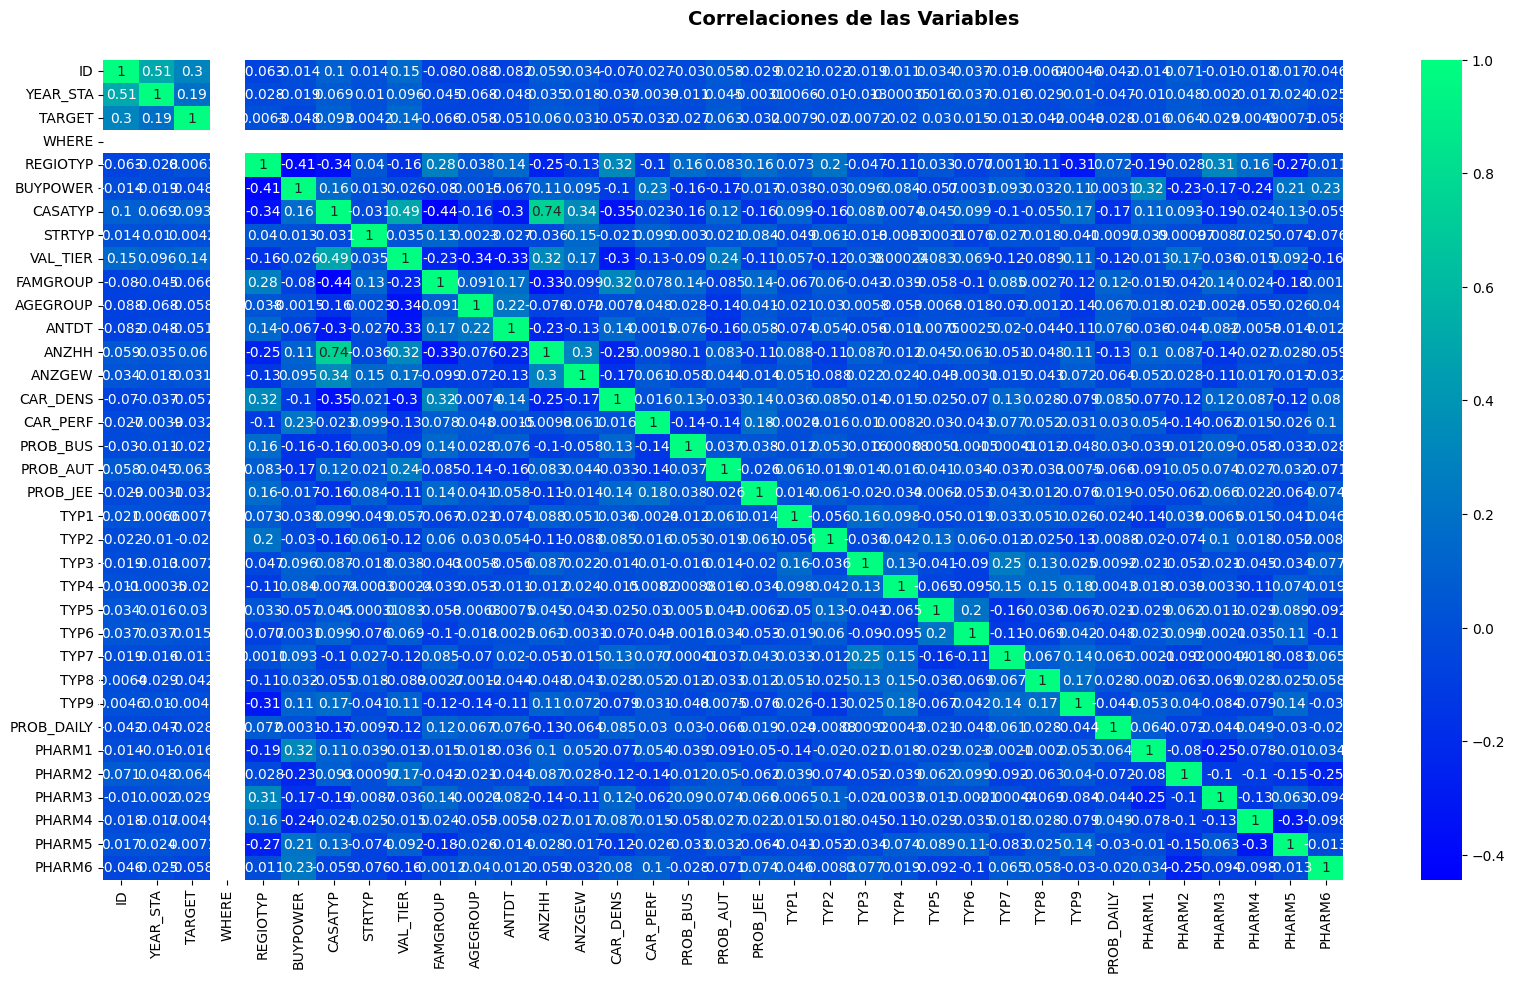

In [ ]:
# Análisis de Correlación

fig, ax = plt.subplots(1, 1, figsize=(20,10))
corr = cleanTrain.corr()
sns.heatmap(corr,ax = ax, cmap='winter',annot=True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones de las Variables', fontsize=14,fontweight='bold')
plt.show()

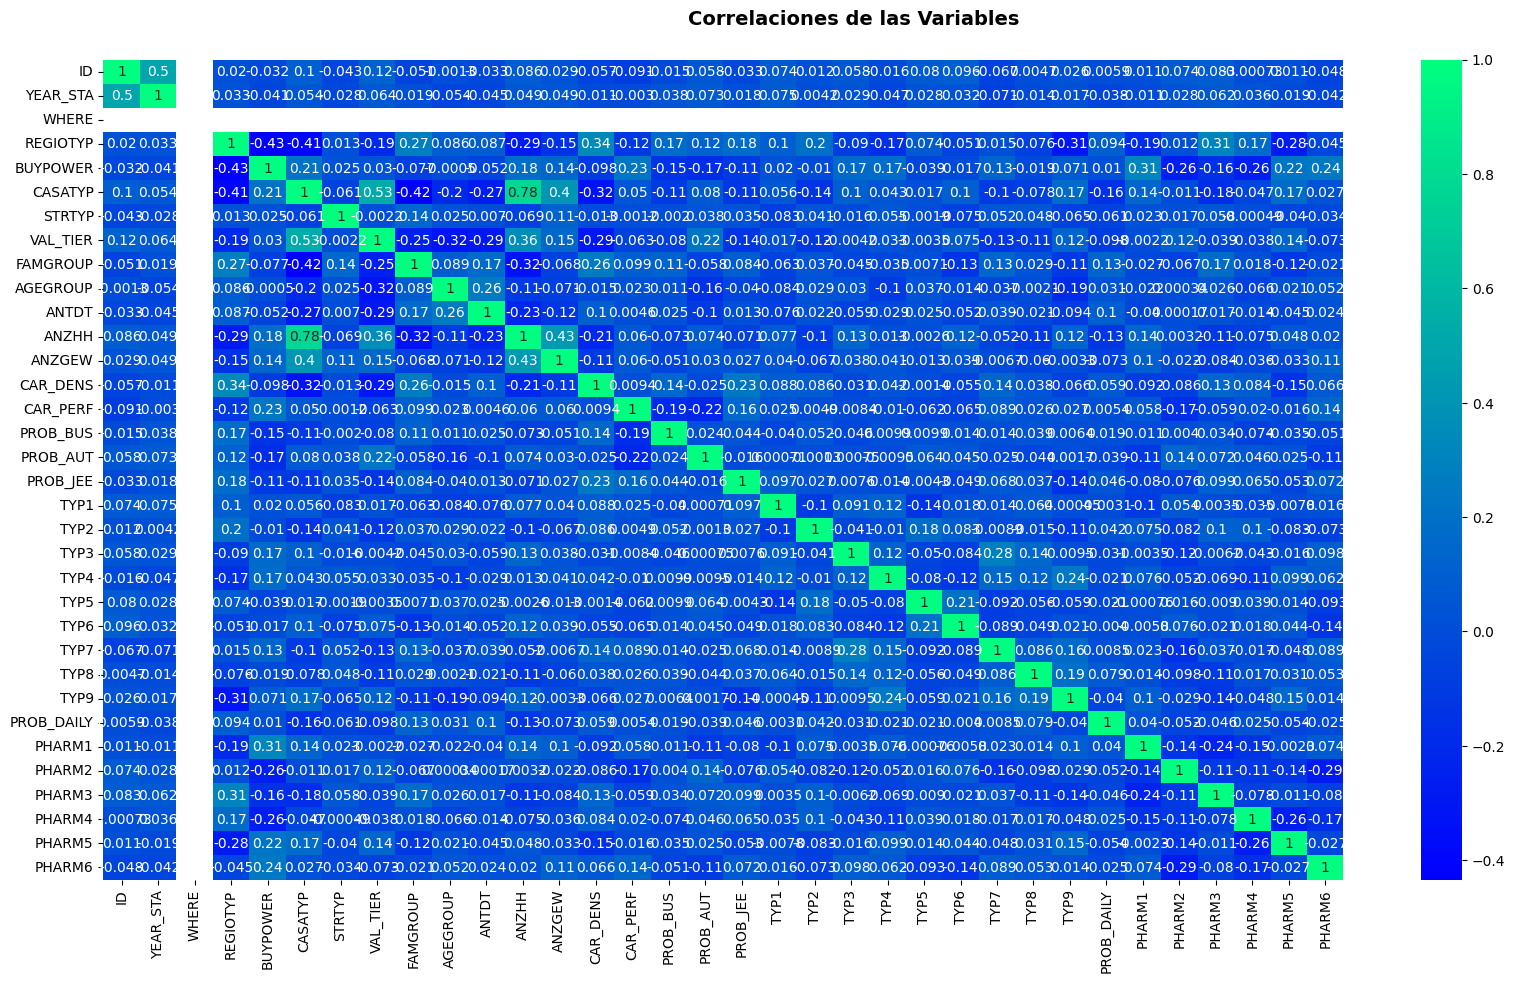

In [ ]:
# Análisis de Correlación

fig, ax = plt.subplots(1, 1, figsize=(20,10))
corr = cleanTest.corr()
sns.heatmap(corr,ax = ax, cmap='winter',annot=True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones de las Variables', fontsize=14,fontweight='bold')
plt.show()

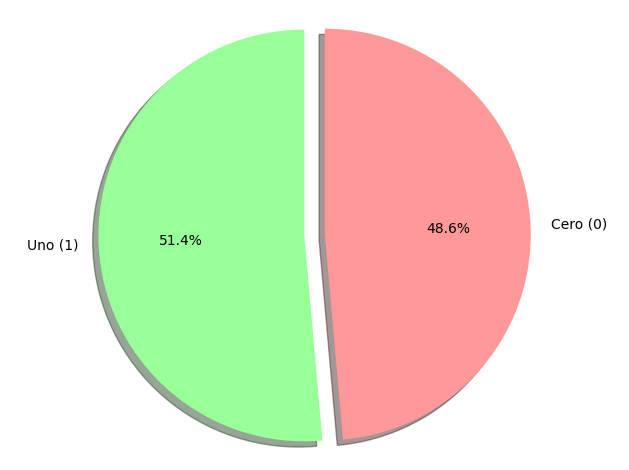

In [ ]:
# Pie chart de la variable 'category'
labels = ['Uno (1)', 'Cero (0)']
sizes = [(cleanTrain.loc[cleanTrain.TARGET == 1, 'TARGET'].count()/cleanTrain.shape[0])*100,
         (cleanTrain.loc[cleanTrain.TARGET == 0, 'TARGET'].count()/cleanTrain.shape[0])*100]
explode = (0, 0.1)
colors = ['#99ff99','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
cleanTrain

,ID,YEAR_STA,TARGET,WHERE,REGIOTYP,BUYPOWER,CASATYP,STRTYP,VAL_TIER,FAMGROUP,...,TYP7,TYP8,TYP9,PROB_DAILY,PHARM1,PHARM2,PHARM3,PHARM4,PHARM5,PHARM6
0,389155,1997,0,0.0,15.0,3.0,1.0,1.0,5.0,7.0,...,1.0,1.0,1.0,4.0,1.0,7.0,1.0,6.0,1.0,5.0
1,102389,1975,0,0.0,12.0,1.0,1.0,1.0,5.0,8.0,...,6.0,6.0,7.0,8.0,1.0,6.0,2.0,7.0,4.0,2.0
2,35454,1989,0,0.0,12.0,3.0,1.0,4.0,1.0,5.0,...,6.0,4.0,4.0,6.0,6.0,5.0,3.0,6.0,2.0,4.0
3,24470,1993,0,0.0,16.0,7.0,2.0,1.0,8.0,6.0,...,1.0,7.0,7.0,1.0,6.0,3.0,2.0,5.0,2.0,6.0
4,370886,1997,0,0.0,14.0,2.0,1.0,1.0,1.0,7.0,...,4.0,7.0,5.0,4.0,3.0,3.0,4.0,7.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,308579,1995,1,0.0,13.0,2.0,2.0,4.0,8.0,4.0,...,6.0,5.0,3.0,1.0,7.0,6.0,1.0,6.0,4.0,1.0
6956,250154,1994,1,0.0,16.0,3.0,1.0,3.0,8.0,7.0,...,6.0,2.0,4.0,2.0,1.0,3.0,7.0,2.0,7.0,1.0
6957,56316,1992,1,0.0,13.0,7.0,3.0,1.0,7.0,5.0,...,5.0,3.0,4.0,1.0,4.0,1.0,2.0,4.0,7.0,5.0
6958,333801,1996,1,0.0,12.0,7.0,1.0,4.0,2.0,9.0,...,7.0,7.0,7.0,7.0,4.0,2.0,6.0,7.0,2.0,5.0


In [ ]:
cleanTrain

,ID,YEAR_STA,TARGET,WHERE,REGIOTYP,BUYPOWER,CASATYP,STRTYP,VAL_TIER,FAMGROUP,...,TYP7,TYP8,TYP9,PROB_DAILY,PHARM1,PHARM2,PHARM3,PHARM4,PHARM5,PHARM6
0,389155,1997,0,0.0,15.0,3.0,1.0,1.0,5.0,7.0,...,1.0,1.0,1.0,4.0,1.0,7.0,1.0,6.0,1.0,5.0
1,102389,1975,0,0.0,12.0,1.0,1.0,1.0,5.0,8.0,...,6.0,6.0,7.0,8.0,1.0,6.0,2.0,7.0,4.0,2.0
2,35454,1989,0,0.0,12.0,3.0,1.0,4.0,1.0,5.0,...,6.0,4.0,4.0,6.0,6.0,5.0,3.0,6.0,2.0,4.0
3,24470,1993,0,0.0,16.0,7.0,2.0,1.0,8.0,6.0,...,1.0,7.0,7.0,1.0,6.0,3.0,2.0,5.0,2.0,6.0
4,370886,1997,0,0.0,14.0,2.0,1.0,1.0,1.0,7.0,...,4.0,7.0,5.0,4.0,3.0,3.0,4.0,7.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,308579,1995,1,0.0,13.0,2.0,2.0,4.0,8.0,4.0,...,6.0,5.0,3.0,1.0,7.0,6.0,1.0,6.0,4.0,1.0
6956,250154,1994,1,0.0,16.0,3.0,1.0,3.0,8.0,7.0,...,6.0,2.0,4.0,2.0,1.0,3.0,7.0,2.0,7.0,1.0
6957,56316,1992,1,0.0,13.0,7.0,3.0,1.0,7.0,5.0,...,5.0,3.0,4.0,1.0,4.0,1.0,2.0,4.0,7.0,5.0
6958,333801,1996,1,0.0,12.0,7.0,1.0,4.0,2.0,9.0,...,7.0,7.0,7.0,7.0,4.0,2.0,6.0,7.0,2.0,5.0


#### Escalamiento de los Datos

In [ ]:
# Escalamos train data
scaledDataTrain = cleanTrain.drop(columns=["ID", "TARGET", "YEAR_STA"])
scaler = StandardScaler()
scaled_features_train = scaler.fit_transform(scaledDataTrain)

columns_train = cleanTrain.columns.tolist()
for var in ["ID", "TARGET", "YEAR_STA"]:
  columns_train.remove(var)

scaled_features_train = pd.DataFrame(scaled_features_train, columns=columns_train)
scaled_features_train = pd.concat([scaled_features_train, cleanTrain[['YEAR_STA', 'TARGET']]], axis=1)

In [ ]:
scaled_features_train

,WHERE,REGIOTYP,BUYPOWER,CASATYP,STRTYP,VAL_TIER,FAMGROUP,AGEGROUP,ANTDT,ANZHH,...,TYP9,PROB_DAILY,PHARM1,PHARM2,PHARM3,PHARM4,PHARM5,PHARM6,YEAR_STA,TARGET
0,0.0,0.826877,-0.656412,-0.720433,-0.604891,-0.015242,0.629384,1.835275,-1.138847,-0.461865,...,-1.587307,-0.219229,-1.381019,1.378111,-1.744850,0.791377,-1.455331,0.903653,1997,0
1,0.0,-0.801608,-1.454913,-0.720433,-0.604891,-0.015242,1.028447,-0.255659,-0.749785,-0.461865,...,1.421860,1.454290,-1.381019,0.863013,-1.215901,1.298838,0.119794,-0.785085,1975,0
2,0.0,-0.801608,-0.656412,-0.720433,2.452511,-1.547102,-0.168742,1.835275,1.584593,-0.311896,...,-0.082723,0.617531,1.175743,0.347914,-0.686951,0.791377,-0.930290,0.340740,1989,0
3,0.0,1.369706,0.940591,0.259671,-0.604891,1.133654,0.230321,-0.255659,-1.527910,-0.161927,...,1.421860,-1.474367,1.175743,-0.682284,-1.215901,0.283916,-0.930290,1.466565,1993,0
4,0.0,0.284049,-1.055662,-0.720433,-0.604891,-1.547102,0.629384,-0.255659,1.584593,-0.461865,...,0.418804,-0.219229,-0.358314,-0.682284,-0.158001,1.298838,-1.455331,-0.222173,1997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,0.0,-0.258779,-1.055662,0.259671,2.452511,1.133654,-0.567804,0.789808,-0.360722,0.138010,...,-0.584251,-1.474367,1.687095,0.863013,-1.744850,0.791377,0.119794,-1.347998,1995,1
6956,0.0,1.369706,-0.656412,-0.720433,1.433377,1.133654,0.629384,-1.301125,1.584593,-0.461865,...,-0.082723,-1.055988,-1.381019,-0.682284,1.428848,-1.238467,1.694919,-1.347998,1994,1
6957,0.0,-0.258779,0.940591,1.239775,-0.604891,0.750689,-0.168742,-0.255659,0.417404,0.287979,...,-0.082723,-1.474367,0.153038,-1.712482,-1.215901,-0.223545,1.694919,0.903653,1992,1
6958,0.0,-0.801608,0.940591,-0.720433,2.452511,-1.164137,1.427509,-0.255659,0.806467,-0.461865,...,1.421860,1.035910,0.153038,-1.197383,0.899899,1.298838,-0.930290,0.903653,1996,1


In [ ]:
# Escalamos test data
scaledDataTest = cleanTest.drop(columns=["ID", "YEAR_STA"])
scaler = StandardScaler()
scaled_features_test = scaler.fit_transform(scaledDataTest)


columns_test = cleanTest.columns.tolist()
for var in ["ID", "YEAR_STA"]:
  columns_test.remove(var)
  
scaled_features_test = pd.DataFrame(scaled_features_test, columns=columns_test)
scaled_features_test = pd.concat([scaled_features_test,cleanTest['YEAR_STA']], axis =1)

In [ ]:
scaled_features_test

,WHERE,REGIOTYP,BUYPOWER,CASATYP,STRTYP,VAL_TIER,FAMGROUP,AGEGROUP,ANTDT,ANZHH,...,TYP8,TYP9,PROB_DAILY,PHARM1,PHARM2,PHARM3,PHARM4,PHARM5,PHARM6,YEAR_STA
0,0.0,-1.346772,1.251521,3.231099,-0.607007,0.050752,-1.365992,-0.327031,-0.786464,3.256377,...,-0.888547,1.436642,-1.045307,0.642286,0.839857,-1.188393,-0.699725,1.200902,-0.868223,1992
1,0.0,-0.249351,-1.070283,-0.735596,2.347010,0.050752,-0.171820,0.698186,0.000997,-0.324504,...,-1.362519,-1.587196,-0.633235,-1.407839,0.839857,-1.188393,0.835783,-1.416958,-0.307392,1994
2,0.0,-1.346772,0.864554,0.256078,-0.607007,1.563735,-1.764049,0.698186,1.182188,0.163798,...,-1.362519,0.428696,0.190909,-1.407839,0.839857,-0.655270,1.347618,-0.893386,1.375101,1996
3,0.0,-0.249351,-0.296348,-0.735596,-0.607007,-1.462231,0.624295,-0.327031,-0.392734,-0.487272,...,-0.414575,1.436642,1.015054,1.667348,0.334151,0.410977,-0.699725,0.153758,-0.868223,1997
4,0.0,-0.798061,1.251521,0.256078,-0.607007,-0.705740,-0.967935,0.698186,-0.786464,-0.161737,...,-0.888547,-1.083223,-1.045307,0.642286,-1.182970,-0.122146,-0.187889,-1.416958,1.935932,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.0,-0.798061,1.638489,-0.735596,1.362338,-1.462231,1.420410,-0.327031,1.575919,-0.487272,...,-0.414575,0.932669,-0.633235,1.667348,-0.171556,0.944101,-1.723397,-1.416958,0.814270,1997
786,0.0,-1.346772,0.477586,2.239425,-0.607007,1.563735,1.022353,-0.327031,-1.180195,0.977634,...,0.533368,0.428696,-0.221163,0.129755,0.839857,0.944101,-1.211561,1.724474,-0.868223,1996
787,0.0,1.396781,-1.457251,0.256078,1.362338,1.185489,0.624295,-0.327031,0.788458,-0.161737,...,-0.888547,0.428696,-1.457380,0.642286,0.839857,-1.721517,-1.723397,0.153758,0.814270,1995
788,0.0,0.848070,0.864554,0.256078,0.377665,0.807244,-0.569877,-0.327031,-1.573925,0.001030,...,-1.362519,-1.083223,-1.457380,0.642286,-1.688676,0.410977,0.323947,0.153758,1.935932,1996


### **Metodo I: Regresion Logistica**

#### Generar muestra

In [ ]:
# Generamos muestras para el testeo de los datos
# ==============================================================================

X_t = scaled_features_train.drop('TARGET', axis=1)
y_t = scaled_features_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X_t, y_t, test_size=0.3, random_state = seed, shuffle = True)

print("")
print("Numero de datos train: ", len(X_train))
print("Numero de datos test: ", len(X_test))
print("Numero total de datos: ", len(X_train) + len(X_test))


Numero de datos train:  4872
Numero de datos test:  2088
Numero total de datos:  6960


#### Seleccion de variables

In [ ]:
# Crear el RFECV con validación cruzada
logreg = LogisticRegression(max_iter=1000000)
rfecv = RFECV(estimator=logreg, step=1, cv=7, scoring='accuracy')

# Ajustar RFECV al conjunto de datos
rfecv.fit(X_t, y_t)
print("Numero optimo de variables: %d" % rfecv.n_features_)
selected_features_log =  list(X_t.columns[rfecv.support_])

Numero optimo de variables: 12


In [ ]:
print(selected_features_log)

['REGIOTYP', 'BUYPOWER', 'CASATYP', 'VAL_TIER', 'FAMGROUP', 'PROB_BUS', 'TYP3', 'TYP8', 'PHARM2', 'PHARM3', 'PHARM6', 'YEAR_STA']


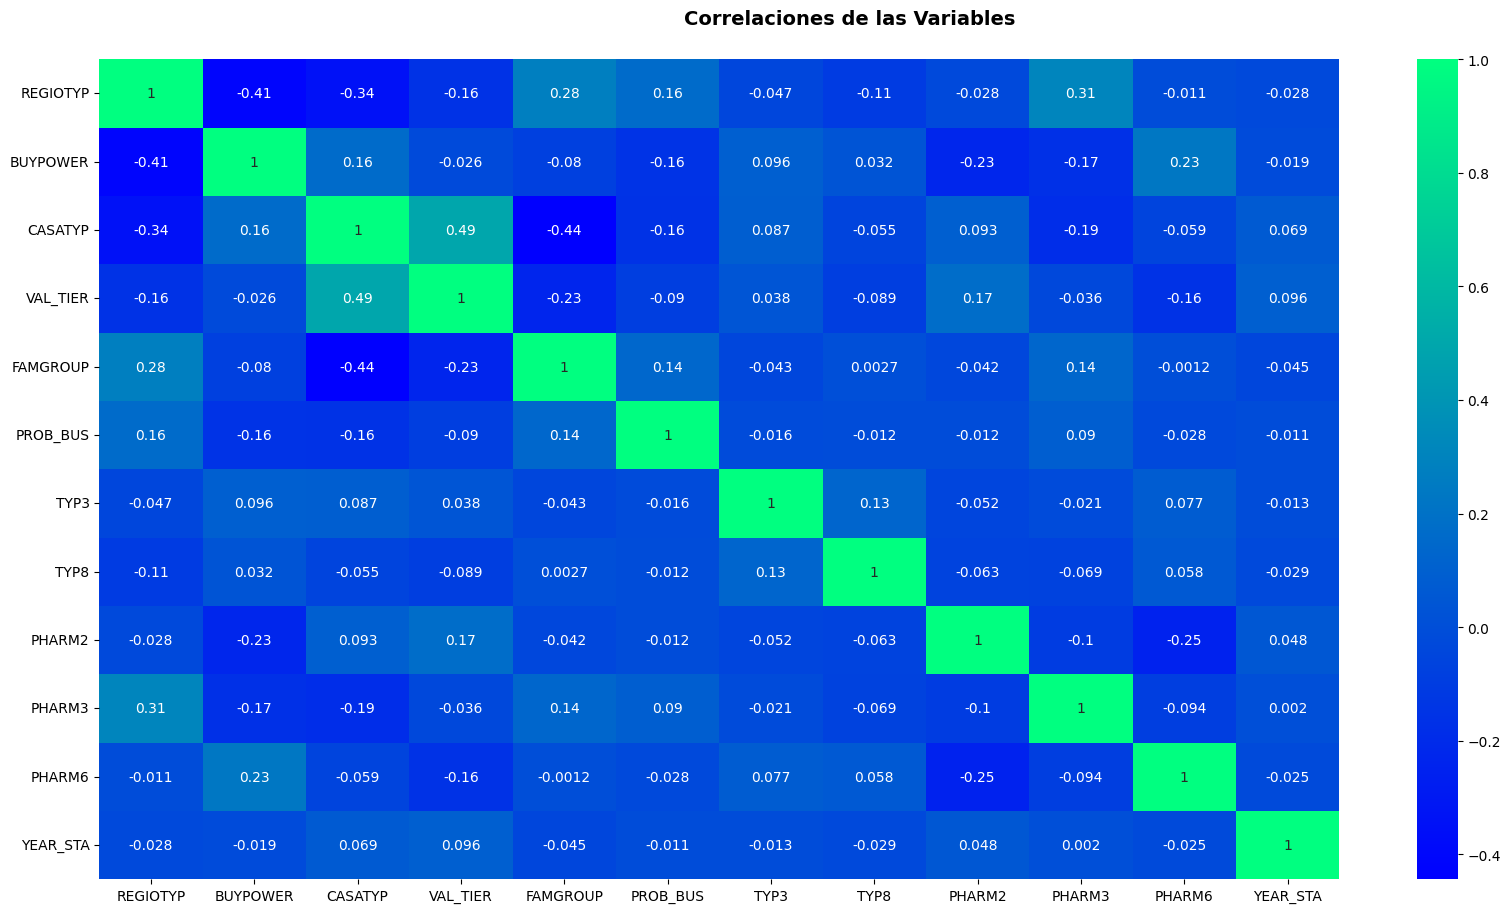

In [ ]:
# Matriz de correlacion de las variables seleccionadas
# ==============================================================================

fig, ax = plt.subplots(1, 1, figsize=(20,10))
corr = cleanTrain[selected_features_log].corr()
sns.heatmap(corr,ax = ax, cmap='winter',annot=True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones de las Variables', fontsize=14,fontweight='bold')
plt.show()

#### Ajustar el modelo

In [ ]:
# Filtramos por features seleccionadas
# ==============================================================================

X_train = X_train[selected_features_log]
X_test = X_test[selected_features_log]

Train/Test split results:
LogisticRegression accuracy is 0.625
LogisticRegression log_loss is 0.647
LogisticRegression auc is 0.658


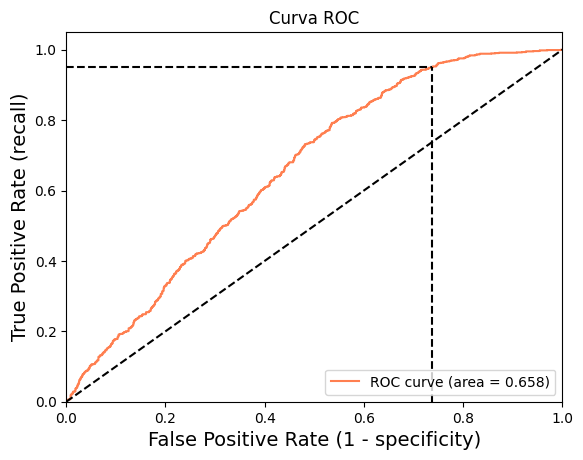

Using a threshold of 0.389 guarantees a sensitivity of 0.951 and a specificity of 0.263, i.e. a false positive rate of 73.69%.


In [ ]:
# Curva ROC del modelo con las features seleccionadas
# ==============================================================================

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Mejor parametro: LogisticRegression(C=0.00018329807108324357, max_iter=1000000)
Mejor parametro: {'C': 0.00018329807108324357}
Mejor puntaje: 0.6455254515599343


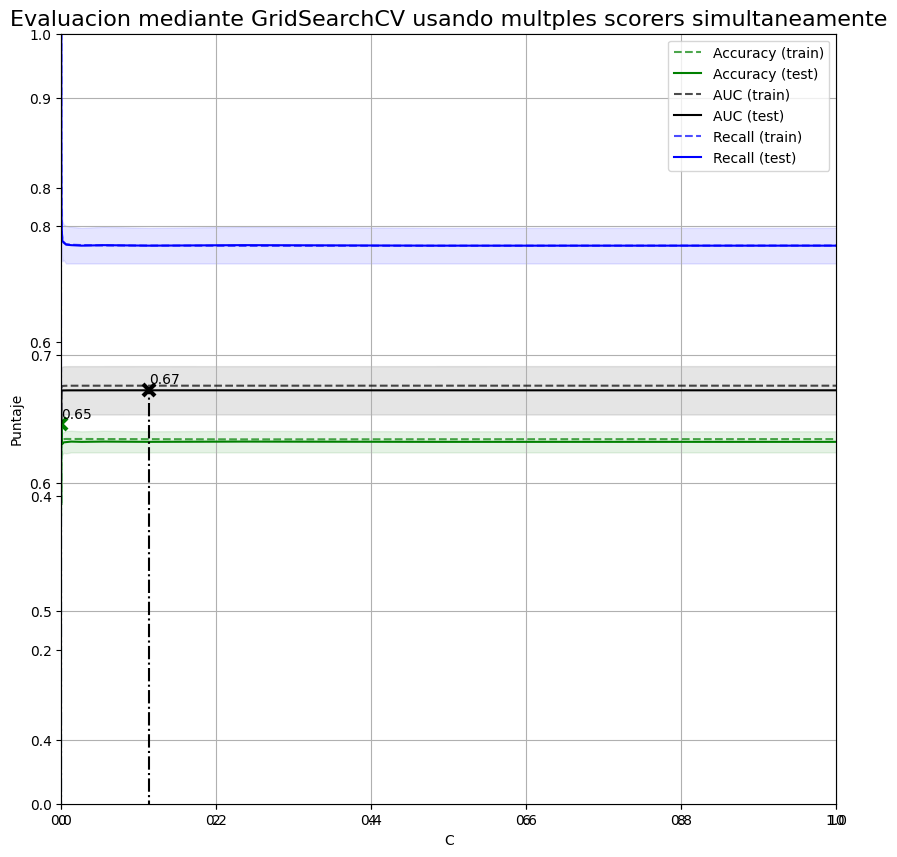

In [ ]:
# GridSearchCV, evaluacion y visualizacion de los modelos segun distintos parametros
# 300 modelos en total (10 folds para cada uno de los 30 candidatos)
# ==============================================================================

from sklearn.model_selection import GridSearchCV # type: ignore

      
param_grid = {'C': np.logspace(-5, 1, num=20)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Recall': 'recall'}

gs = GridSearchCV(logreg, return_train_score=True,
                  # **** VERBOSE = 2 PARA VER TODOS LOS VALORES DE LOS MODELOS ***
                  param_grid=param_grid, scoring=scoring, cv=7, refit='Accuracy', verbose=0)

gs.fit(X_train, y_train)
results = gs.cv_results_

print('='*20)
print("Mejor parametro: " + str(gs.best_estimator_))
print("Mejor parametro: " + str(gs.best_params_))
print('Mejor puntaje:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("Evaluacion mediante GridSearchCV usando multples scorers simultaneamente",fontsize=16)

plt.xlabel("C")
plt.ylabel("Puntaje")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
# Guardamos el modelo generado
import copy

gs_log = copy.deepcopy(gs)

#### Resultado modelo final

In [ ]:
# Prediccion del modelo final sobre el test
# ==============================================================================

resultado = gs_log.predict(X_test)
resultado_proba = gs_log.predict_proba(X_test)[:, 1]

In [ ]:
matriz_confusion = confusion_matrix(y_test, resultado)
mostrar_confusion(y_test, resultado)

Verdaderos Positivos(VP): 940
Falsos Negativos(FN): 114
Falsos Positivos(FP): 652
Verdaderos Negativos(VN): 382


Train/Test split results:
LogisticRegression accuracy is 0.625
LogisticRegression log_loss is 0.647
LogisticRegression auc is 0.644


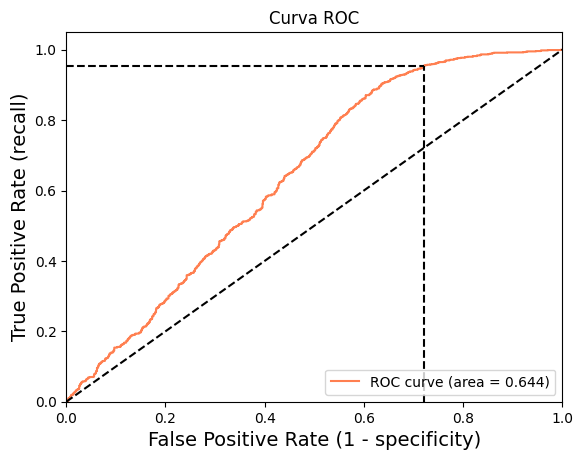

Using a threshold of 0.468 guarantees a sensitivity of 0.954 and a specificity of 0.279, i.e. a false positive rate of 72.05%.


In [ ]:
# Curva ROC modelo final
# ==============================================================================

[fpr, tpr, thr] = roc_curve(y_test, resultado_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# Metricas en base a matriz de confusion
# ==============================================================================

# Calcular métricas
accuracy = accuracy_score(y_test, resultado)
precision = precision_score(y_test, resultado)
recall = recall_score(y_test, resultado)
f1 = f1_score(y_test, resultado)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6331
Precision: 0.5905
Recall: 0.8918
F1-score: 0.7105


In [ ]:
print("Respecto a las métricas de clasificación tenemos: ")
print("Testeo")
print(classification_report(y_test, resultado))

Respecto a las métricas de clasificación tenemos: 
Testeo
              precision    recall  f1-score   support

           0       0.77      0.37      0.50      1034
           1       0.59      0.89      0.71      1054

    accuracy                           0.63      2088
   macro avg       0.68      0.63      0.60      2088
weighted avg       0.68      0.63      0.61      2088



### **Metodo II: Decision Tree**

#### Generar muestra

In [ ]:
# Generamos muestras para el testeo de los datos
# ==============================================================================

X_t = scaled_features_train.drop('TARGET', axis=1)
y_t = scaled_features_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X_t, y_t, test_size=0.3, random_state = seed, shuffle = True)

print("")
print("Numero de datos train: ", len(X_train))
print("Numero de datos test: ", len(X_test))
print("Numero total de datos: ", len(X_train) + len(X_test))


Numero de datos train:  4872
Numero de datos test:  2088
Numero total de datos:  6960


#### Selección de Variables

In [ ]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=16, random_state=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Get feature importances
importances = clf.feature_importances_
 
# Select features with importance greater than a threshold
threshold = 0.1  # Adjust as needed
selected_features_tree = X_t.columns[importances > threshold]
 
# Use only the selected features
X_train_selected = X_train[selected_features_tree]
X_test_selected = X_test[selected_features_tree]

#### Resultado modelo final

In [ ]:
# Train a new model using the selected features
clf_selected = DecisionTreeClassifier(max_depth=16, random_state=8)
clf_selected.fit(X_train_selected, y_train)

DecisionTreeClassifier(max_depth=16, random_state=8)

In [ ]:
# Make predictions on the test set using the model trained with all features
y_pred_all_features = clf.predict(X_test)
 
# Calculate the accuracy of the model with all features
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f"Accuracy with all features: {accuracy_all_features}")
 
# Make predictions on the test set using the model trained with selected features
y_pred_selected_features = clf_selected.predict(X_test_selected)
 
# Calculate the accuracy of the model with selected features
accuracy_selected_features = accuracy_score(y_test, y_pred_selected_features)
print(f"Accuracy with selected features: {accuracy_selected_features}")

Accuracy with all features: 0.5704022988505747
Accuracy with selected features: 0.6355363984674329


In [ ]:
mostrar_confusion(y_test, y_pred_selected_features)

Verdaderos Positivos(VP): 905
Falsos Negativos(FN): 149
Falsos Positivos(FP): 612
Verdaderos Negativos(VN): 422


In [ ]:
print("Respecto a las métricas de clasificación tenemos: ")
print("Testeo")
print(classification_report(y_test, y_pred_selected_features))

Respecto a las métricas de clasificación tenemos: 
Testeo
              precision    recall  f1-score   support

           0       0.74      0.41      0.53      1034
           1       0.60      0.86      0.70      1054

    accuracy                           0.64      2088
   macro avg       0.67      0.63      0.61      2088
weighted avg       0.67      0.64      0.62      2088



In [ ]:
# Metricas en base a matriz de confusion
# ==============================================================================

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_selected_features)
precision = precision_score(y_test, y_pred_selected_features)
recall = recall_score(y_test, y_pred_selected_features)
f1 = f1_score(y_test, y_pred_selected_features)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6355
Precision: 0.5966
Recall: 0.8586
F1-score: 0.7040


### **Metodo III: Random Forest**

#### Generar muestra

In [ ]:
# Generamos muestras para el testeo de los datos
# ==============================================================================

X_t = scaled_features_train.drop('TARGET', axis=1)
y_t = scaled_features_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X_t, y_t, test_size=0.3, random_state = seed, shuffle = True)

print("")
print("Numero de datos train: ", len(X_train))
print("Numero de datos test: ", len(X_test))
print("Numero total de datos: ", len(X_train) + len(X_test))


Numero de datos train:  4872
Numero de datos test:  2088
Numero total de datos:  6960


#### Selección de Hiperparametros

In [ ]:
param_grid = {
    "n_estimators": [10,20,30,40],
    "max_depth": [8,10,20,30],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(random_state = 0)
rfGrid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'f1_micro', cv=5, refit='f1_score', return_train_score=True)

best_rf = rfGrid.fit(X_train, y_train)

print("Mejores parámetros")
print(best_rf.best_params_)

print (f'f1 score Train - : {best_rf.score(X_train, y_train):.3f}')
print (f'f1 score Test - : {best_rf.score(X_test, y_test):.3f}')

Mejores parámetros
{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 20}
f1 score Train - : 0.792
f1 score Test - : 0.634


#### Resultado modelo final

In [ ]:
rf = RandomForestClassifier(random_state = 0, n_estimators = 20, max_depth = 10, min_samples_split = 5, max_features = "sqrt")
rf_final = rf.fit(X_train, y_train)

In [ ]:
resultado = rf_final.predict(X_test)

In [ ]:
mostrar_confusion(y_test, resultado)

Verdaderos Positivos(VP): 795
Falsos Negativos(FN): 259
Falsos Positivos(FP): 524
Verdaderos Negativos(VN): 510


In [ ]:
print("Respecto a las métricas de clasificación tenemos: ")
print("Testeo")
print(classification_report(y_test, resultado))

Respecto a las métricas de clasificación tenemos: 
Testeo
              precision    recall  f1-score   support

           0       0.66      0.49      0.57      1034
           1       0.60      0.75      0.67      1054

    accuracy                           0.62      2088
   macro avg       0.63      0.62      0.62      2088
weighted avg       0.63      0.62      0.62      2088



In [ ]:
# Metricas en base a matriz de confusion
# ==============================================================================

# Calcular métricas
accuracy = accuracy_score(y_test, resultado)
precision = precision_score(y_test, resultado)
recall = recall_score(y_test, resultado)
f1 = f1_score(y_test, resultado)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6250
Precision: 0.6027
Recall: 0.7543
F1-score: 0.6700


### **Parte II: Aplicando el modelo al data objetivo**

Dado que regresión logistica dio mejores resultados, se procede a realizar la predicción con el modelo de regresión logistica

#### Preparamos los datos

In [ ]:
scaled_features_test

,WHERE,REGIOTYP,BUYPOWER,CASATYP,STRTYP,VAL_TIER,FAMGROUP,AGEGROUP,ANTDT,ANZHH,...,TYP8,TYP9,PROB_DAILY,PHARM1,PHARM2,PHARM3,PHARM4,PHARM5,PHARM6,YEAR_STA
0,0.0,-1.346772,1.251521,3.231099,-0.607007,0.050752,-1.365992,-0.327031,-0.786464,3.256377,...,-0.888547,1.436642,-1.045307,0.642286,0.839857,-1.188393,-0.699725,1.200902,-0.868223,1992
1,0.0,-0.249351,-1.070283,-0.735596,2.347010,0.050752,-0.171820,0.698186,0.000997,-0.324504,...,-1.362519,-1.587196,-0.633235,-1.407839,0.839857,-1.188393,0.835783,-1.416958,-0.307392,1994
2,0.0,-1.346772,0.864554,0.256078,-0.607007,1.563735,-1.764049,0.698186,1.182188,0.163798,...,-1.362519,0.428696,0.190909,-1.407839,0.839857,-0.655270,1.347618,-0.893386,1.375101,1996
3,0.0,-0.249351,-0.296348,-0.735596,-0.607007,-1.462231,0.624295,-0.327031,-0.392734,-0.487272,...,-0.414575,1.436642,1.015054,1.667348,0.334151,0.410977,-0.699725,0.153758,-0.868223,1997
4,0.0,-0.798061,1.251521,0.256078,-0.607007,-0.705740,-0.967935,0.698186,-0.786464,-0.161737,...,-0.888547,-1.083223,-1.045307,0.642286,-1.182970,-0.122146,-0.187889,-1.416958,1.935932,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.0,-0.798061,1.638489,-0.735596,1.362338,-1.462231,1.420410,-0.327031,1.575919,-0.487272,...,-0.414575,0.932669,-0.633235,1.667348,-0.171556,0.944101,-1.723397,-1.416958,0.814270,1997
786,0.0,-1.346772,0.477586,2.239425,-0.607007,1.563735,1.022353,-0.327031,-1.180195,0.977634,...,0.533368,0.428696,-0.221163,0.129755,0.839857,0.944101,-1.211561,1.724474,-0.868223,1996
787,0.0,1.396781,-1.457251,0.256078,1.362338,1.185489,0.624295,-0.327031,0.788458,-0.161737,...,-0.888547,0.428696,-1.457380,0.642286,0.839857,-1.721517,-1.723397,0.153758,0.814270,1995
788,0.0,0.848070,0.864554,0.256078,0.377665,0.807244,-0.569877,-0.327031,-1.573925,0.001030,...,-1.362519,-1.083223,-1.457380,0.642286,-1.688676,0.410977,0.323947,0.153758,1.935932,1996


In [ ]:
# Eliminamos columnas que no se usaron previamente para el entrenamiento de los datos (regresion logistica)
# ==============================================================================
scaled_features_test = scaled_features_test[selected_features_log]

#### Aplicamos el modelo

In [ ]:
# Aplicación del modelo
# ==============================================================================
# Asegurándonos de trabajar sobre una copia para evitar SettingWithCopyWarning
scaled_features_test = scaled_features_test.copy()

# Asignando las predicciones al DataFrame usando .loc para evitar warnings
scaled_features_test.loc[:, 'TARGET'] = gs_log.predict(scaled_features_test)

# Creando el DataFrame de submission
submission = pd.concat([cleanTest['ID'], scaled_features_test['TARGET']], axis=1)

# Mostrando el DataFrame de submission
print(submission)

# Guardando el DataFrame en un archivo CSV con ';' como separador
submission.to_csv('submission.csv', sep=';', index=False)

/tmp/ipykernel_1876/2892542601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_features_test['TARGET'] = gs_log.predict(scaled_features_test)


,ID,TARGET
0,28306,0
1,241585,1
2,368506,1
3,374891,1
4,321433,1
...,...,...
785,384475,1
786,368503,1
787,284643,1
788,354426,1


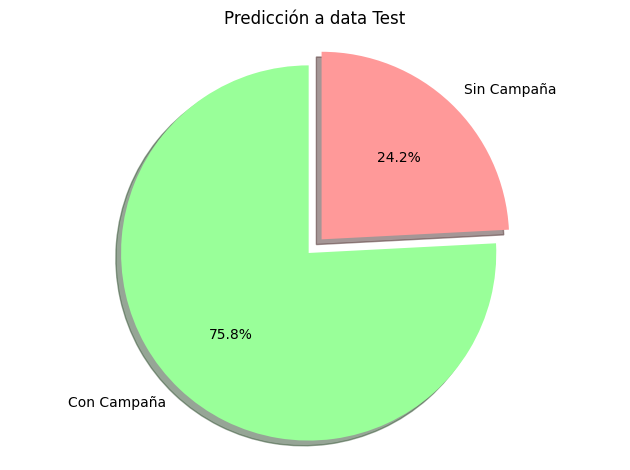

In [ ]:
# Proporción de los resultados
# ==============================================================================
# Pie chart variable TARGET
labels = ['Con Campaña', 'Sin Campaña']
sizes = [(scaled_features_test.loc[scaled_features_test.TARGET == 1, 'TARGET'].count()/scaled_features_test.shape[0])*100,
         (scaled_features_test.loc[scaled_features_test.TARGET == 0, 'TARGET'].count()/scaled_features_test.shape[0])*100]

# Solo "explode" el segundo segmento (i.e., 'Sin Campaña')
explode = (0, 0.1)
colors = ['#99ff99','#ff9999']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Se asegura que el pie chart sea dibujado como un círculo
ax1.axis('equal')

# Agregar título
ax1.set_title('Predicción a data Test')

plt.tight_layout()
plt.show()
